# DAY 1 
## COST FUNCTION

In [617]:
import numpy as np
import matplotlib.pyplot as plt

In [618]:
# Dataset

m = 25 # Numnbers of Example
n = 2 # Numbers Of Features (including Bais)
X = np.array(range(m)).reshape(-1,1)
Y = np.array(range(m)).reshape(-1,1)
theta = np.random.random((n,1))

$ Y = {\theta}_0 * X_0 + {\theta}_1 * X_1   $

$ X_0 = 1 $

In [619]:
# Adding bais X(0) Value in X  

Xnew = np.insert(X,0,1,axis=1)

$ h_{\theta} = X * {\theta} $

In [620]:
# Initial Prediction Of Y (with out Training)

h = Xnew.dot(theta)

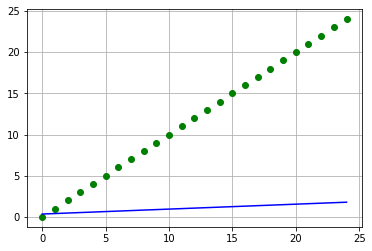

In [621]:
# Plot Data into 2D scatter Plot (initial Observation)

plt.figure(1)
plt.plot(X,Y,'go')
plt.plot(X,h,'b')
plt.grid(True)

# Cost Function For Regression Model

$ Cost=  1 / (2*m) \sum \limits _{i=1} ^{m} {(h_{\theta}(x ^i) - y ^i)}^2 $

In [622]:
# Step By Step Solution

$ error = h_{\theta} - Y $ 

$ sqrError = {error} ^2  $

$ sumOfError = \sum \limits_{i=1} ^{m} {sqrError}^i $

$ Cost = 1/(2*m) * sumOfError $

In [623]:
def Cost_function(Y,h):
    error = h - Y
    sqr_error = np.square(error)
    sum_Of_error = np.sum(sqr_error)
    return 1/(2*m) * sum_Of_error

In [624]:
# Value Of Cost Function Define Accuraccy of Hypothesis' Fucntion
# More Closer to 0, More Better and accurate Value of Theta we have
# Our main Goal is minimize this Cost Function By using Gradient Descenet Algorithm 

Cost_function(Y,h)

82.72975014426758

In [625]:
# Why we use mean 1/2 term in this Cost Function ?
# The mean 1/2 as a convinence for the computing of gradient descent 
# as the derivation term of the square function will cencel out the 1/2 term

In [626]:
# Why We can't us Absolute Error instead of Squared Error ?
# Gradient is not continous, because the absolute function has not derivate at level 0

# Graph Of Cost Fucntion Vs. Different Theta Values

#### This is the Graph of Theta_1 vs Cost (Assume Theta_0 is set to be 0)

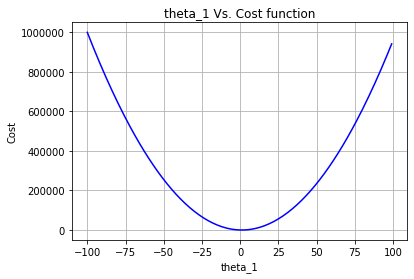

In [627]:
theta_copy = np.copy(theta)
theta_copy[0] = 0
J = []

for i in range(-100,100):
    theta_copy[1] = i
    h_error = Xnew.dot(theta_copy)
    J.append(Cost_function(Y,h_error))
    
# Cost Function Vs. Theta1 Graph

theta_1 = np.array(range(-100,100)).reshape(-1,1)
plt.figure(1)
plt.plot(theta_1,J,'b')
plt.xlabel('theta_1')
plt.ylabel('Cost')
plt.title('theta_1 Vs. Cost function')
plt.grid(True)

#### This is the Graph of Theta vs Cost (In this Graph both theta_0 and Theta_1 is included)

In [628]:
# Import For 3D Graph
from mpl_toolkits import mplot3d

t1 = np.linspace(-6, 6, 200).reshape(-1,1)
t2 = np.linspace(-6, 6, 200).reshape(-1,1)

J_3D = []
theta_new = np.copy(theta)
for i in range(200):
    theta_new[0] = t1[i]
    theta_new[1] = t2[i]
    h_error = Xnew.dot(theta_new)
    J_3D.append(Cost_function(Y,h_error))

    
J_3D = np.array(J_3D).reshape(-1,1)

J_3D = np.ones(J_3D.shape[0])*J_3D

T1,T2 = np.meshgrid(t1,t2)

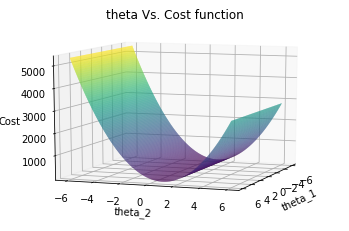

In [629]:
fig = plt.figure(2)
ax = plt.axes(projection='3d')
ax.plot_surface(T1, T2, J_3D, rstride=1, cstride=1,
                                        cmap='viridis', edgecolor='none')
plt.title('theta Vs. Cost function')
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_2')
ax.set_zlabel('Cost');
ax.view_init(10, 20)

In [630]:
# Note Both Graphs have Bow (Convex) function It's mean it's only contain Global miniumum
# Our Gaol is to find global minimum of the Cost Function using Gradient DDesccent

# DAY 2
## Gradient descent

Our Main Objective is to minimize Cost Function
Which is done throught Changing of $ {\theta} $ Values
By using Gradient Dscent

## Gradent Descent:   $ \theta_i := {\theta}_i - \alpha * \frac{1}{m} \sum J {(h_{(\theta_i)} - y_i)}  $

for uni-variate Linear Regreession (We have only one variable + baise term)
### $ temp_0 = {\theta}_0 - \alpha * \frac{1}{m} \sum \limits_{i=1} ^{m} J {(h_{(\theta_i)} - y)}  $
### $ temp_1 = {\theta}_1 - \alpha * \frac{1}{m} \sum \limits_{i=1} ^{m} J {(h_{(\theta_i)} - y)} * x_i  $
### $ \theta_0 = temp_0 $
### $ \theta_1 = temp_1 $

##### So What is  $ {\alpha} $ = ??
###### It's a value of step size When we take gradient of Cost Fucntion, it's define how much step sizee we take towards Global minimum
###### Note: Large Step Size might be Diverge you from a Global minimum

In [631]:
# Implmentation of Gradient Descent

def Gradient_descent(X, Y, theta, alpha=0.3, itr=50):
    i = 0
    J_array = []
    theta_values = []
    while i < itr:
        
        theta_values.append(np.copy(theta[1]))
        
        h_error = X.dot(theta)
        temp0 = alpha * (1/m) * (h_error-Y).T.dot(X[:,0].reshape(-1,1))
        temp1 = alpha * (1/m) * (h_error-Y).T.dot(X[:,1].reshape(-1,1))
        theta[0] = theta[0] - temp0
        theta[1] = theta[1] - temp1
        
        
        
        J_array.append(Cost_function(Y,h_error))
        
        i+=1
        
    return J_array,theta,theta_values

In [632]:
itr = 50
alpha = 0.01
J_array,theta_update,theta_values = Gradient_descent(Xnew, Y, theta, alpha, itr)
print("Updated Theta: \n{}\n at cost of {}".format(theta_update,J_array[-1]))

Updated Theta: 
[[0.34482248]
 [0.80407765]]
 at cost of 3.2160813751698685


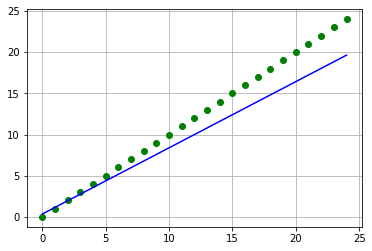

In [633]:
# Plot Data After Training 

plt.figure(3)
plt.plot(X,Y,'go')
plt.plot(X,Xnew.dot(theta_update),'b')
plt.grid(True)

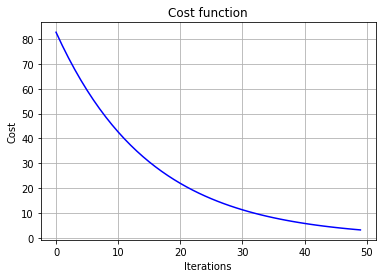

In [634]:
# Cost Function Graph Vs Iteration


plt.figure(4)
plt.plot(range(len(J_array)),J_array,'b')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function')
plt.grid(True)

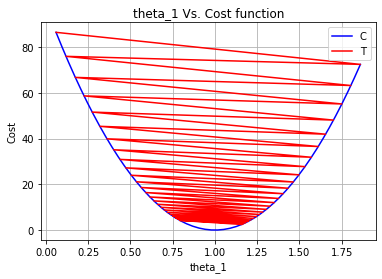

In [635]:
theta_copy = np.copy(theta)
theta_copy[0] = 0
J = []
J2 = []

for i in np.linspace(np.min(theta_values),np.max(theta_values),itr):
    theta_copy[1] = i
    h_error = Xnew.dot(theta_copy)
    J.append(Cost_function(Y,h_error))
    
for i in theta_values:
    theta_copy[1] = i
    h_error = Xnew.dot(theta_copy)
    J2.append(Cost_function(Y,h_error))
    
# Cost Function Vs. Theta1 Graph

theta_1 = np.linspace(np.min(theta_values),np.max(theta_values),itr).reshape(-1,1)
plt.figure(1)
plt.plot(theta_1,J,'b')
plt.plot(theta_values,J2,'r')
plt.xlabel('theta_1')
plt.ylabel('Cost')
plt.legend('CT')
plt.title('theta_1 Vs. Cost function')
plt.grid(True)

# C = Cost Function
# T = Training or Converge to Global minimum

In [636]:
# As we Notice that alpha = 0.01 Makes Cost Value Jumps from Neeegative to Poistive
# This is not a goodd sign because even a minor increse in cost function Makes 
# Us Divergee from thee Global Mimunim And Our Cost Inccrease Rapidly

In [637]:
itr = 50
alpha = 0.02
J_array,theta_update,theta_values = Gradient_descent(Xnew, Y, theta, alpha, itr)
print("Updated Theta: \n{}\n at cost of {}".format(theta_update,J_array[-1]))

# As notice Our Cost Function Increase Rapidly!!

Updated Theta: 
[[-2.55074147e+21]
 [-4.16059276e+22]]
 at cost of 1.9845468122640705e+46


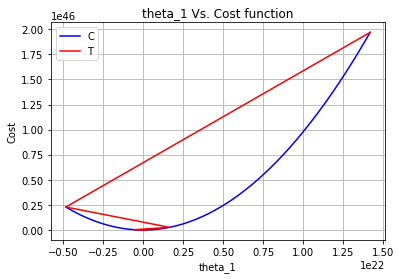

In [638]:
theta_copy = np.copy(theta)
theta_copy[0] = 0
J = []
J2 = []

for i in np.linspace(np.min(theta_values),np.max(theta_values),itr):
    theta_copy[1] = i
    h_error = Xnew.dot(theta_copy)
    J.append(Cost_function(Y,h_error))
    
for i in theta_values:
    theta_copy[1] = i
    h_error = Xnew.dot(theta_copy)
    J2.append(Cost_function(Y,h_error))
    
# Cost Function Vs. Theta1 Graph

theta_1 = np.linspace(np.min(theta_values),np.max(theta_values),itr).reshape(-1,1)
plt.figure(1)
plt.plot(theta_1,J,'b')
plt.plot(theta_values,J2,'r')
plt.xlabel('theta_1')
plt.ylabel('Cost')
plt.legend('CT')
plt.title('theta_1 Vs. Cost function')
plt.grid(True)


In [639]:
# A notice that We have Diverge from the global minimum this is beecuase Or X is far
# away from one another wee need to use Feature Normalizatiton to Prevent This type of pronblem